# Испит по Основи на Вештачката Интелигенција

**Датум**: 09.06.2021

## Задача 1

**(20 поени)** 
Со помош на алгоритамот со униформна цена и А* алгоритамот да се изврши пребарување на дадениот граф од почетната позиција Ѕ до целта G.

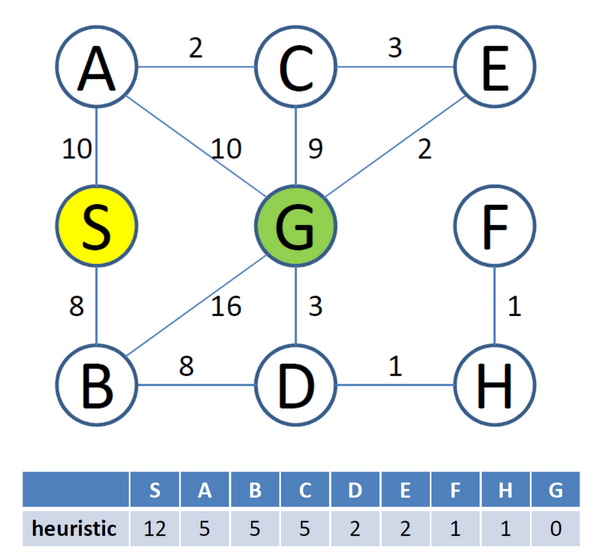

In [4]:
from IPython import display
display.Image('A_star.png', width=450)

In [5]:
import heapq

In [6]:
d_heuristic = {'S':12, 'A':5, 'B':5, 'C':5, 'D':2, 'E':2, 'F':1, 'H':1, 'G':0}

In [7]:
class WeightedGraph():
    def __init__(self):
        self.graph_dict = {}
    
    def add_vertex(self, vertex):
        if vertex not in self.graph_dict:
            self.graph_dict[vertex] = {}
    
    def vertices(self):
        return list(self.graph_dict.keys())
    
    def add_edge(self, edge, add_reversed = True):
        vertex1, vertex2, weight = edge
        self.graph_dict[vertex1][vertex2] = weight
        if add_reversed:
            self.graph_dict[vertex2][vertex1] = weight
    
    def edges(self):
        edges = []
        for vertex in self.graph_dict:
            for neighbour, weight in self.graph_dict[vertex].items():
                edges.append((vertex, neighbour, weight))
        return edges
    
    def neighbours(self, vertex):
        return list(self.graph_dict[vertex].items())

In [19]:
def uniform_cost_search(graph, starting_vertex, goal_vertex):
    if starting_vertex == goal_vertex:
        return []
    queue = [(0,[starting_vertex])]
    expanded = set()
    heapq.heapify(queue)
    while queue:
        weight, vertex_list = heapq.heappop(queue)
        vertex_to_expand = vertex_list[-1]
        if vertex_to_expand not in expanded:
            if vertex_to_expand == goal_vertex:
                print(len(expanded))
                return weight, vertex_list
            for neighbour, new_weight in graph.neighbours(vertex_to_expand):
                if neighbour not in expanded:
                    heapq.heappush(queue, (weight + new_weight, vertex_list + [neighbour]))
            expanded.add(vertex_to_expand)

In [20]:
def a_star_search(graph, starting_vertex, goal_vertex, heuristic_function, alpha=1):
    if starting_vertex == goal_vertex:
        return 
    queue = [((0,0), [starting_vertex])]
    heapq.heapify(queue)
    expanded = set()
    while queue:
        weight_tuple, vertex_list = heapq.heappop(queue)
        current_a_star_weight, current_path_weight = weight_tuple
        vertex_to_expand = vertex_list[-1]
        if vertex_to_expand not in expanded:
            if vertex_to_expand == goal_vertex:
                print(len(expanded))
                return current_path_weight, vertex_list
            for neighbour, new_path_weight in graph.neighbours(vertex_to_expand):
                if neighbour not in expanded:
                    path_weight = current_path_weight + new_path_weight
                    heuristic = heuristic_function(neighbour)
                    a_star_weight = path_weight + alpha*heuristic
                    heapq.heappush(queue, ((a_star_weight, path_weight), vertex_list + [neighbour]))
            expanded.add(vertex_to_expand)

In [21]:
def heuristic(vertex):
    return d_heuristic[vertex]

In [22]:
graph = WeightedGraph()

In [23]:
graph.add_vertex('A')
graph.add_vertex('C')
graph.add_vertex('E')
graph.add_vertex('S')
graph.add_vertex('G')
graph.add_vertex('F')
graph.add_vertex('B')
graph.add_vertex('D')
graph.add_vertex('H')

In [24]:
graph.add_edge(('A','C',2))
graph.add_edge(('A','G',10))
graph.add_edge(('A','S',10))
graph.add_edge(('C','G',9))
graph.add_edge(('C','E',3))
graph.add_edge(('G','E',2))
graph.add_edge(('S','B',8))
graph.add_edge(('B','G',16))
graph.add_edge(('B','D',8))
graph.add_edge(('D','G',3))
graph.add_edge(('D','H',1))
graph.add_edge(('H','F',1))

In [25]:
weight, path = a_star_search(graph,'S', 'G', heuristic_function = heuristic)
print(weight, path)

5
17 ['S', 'A', 'C', 'E', 'G']


In [26]:
weight2, path2 = uniform_cost_search(graph, 'S', 'G')
print(weight2, path2)

6
17 ['S', 'A', 'C', 'E', 'G']


In [27]:
# Разликата е во бројот на разгранети јазли